# Урок 5. Тестирование гипотез

**Статистическая гипотеза** \
– это предположение о неизвестном распределении случайных величин, соответствующих каким-либо представлениям о том явлении, которое изучается.

***
## Алгоритм для тестирования гипотез

1. Формулирование нулевой $H_0$ и альтернативной гипотез $H_1$.
2. Выбор уровня статистической значимости $\alpha$.
3. Выбор статистического критерия.
4. Расчет наблюдаемого критерия.
5. Сравнение табличного и наблюдаемого значения.
6. Вывод.

***
### 1. Формулирование нулевой $H_0$ и альтернативной гипотез $H_1$

**Нулевая гипотеза** $H_0$ \
– это утверждение о свойствах генеральной совокупности, которое кажется правдоподобным, но требует проверки.

**Альтернативной гипотезой** $H_1$ \
является любая действительная гипотеза, отличная от нулевой.

Новое утверждение всегда вкладывается в альтернативную гипотезу $H_1$. \
Пока не будет доказано, что нулевая гипотеза $H_0$ ложная, она считается истинной.

#### Варианты альтернативной гипотезы

$H_0: \mu = \mu_0$

$H_1: \mu > \mu_0 \\
 H_1: \mu < \mu_0 \\
 H_1: \mu \not= \mu_0$
 
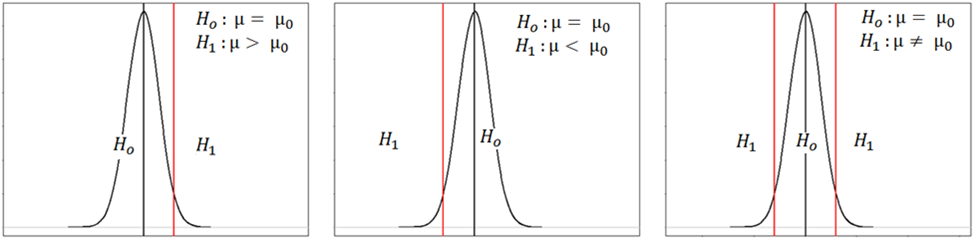

***
### 2. Выбор уровня статистической значимости $\alpha$

Выбор уровня статистической значимости $\alpha$ делается на усмотрение того, кто проводит тест.

Чаще всего для $\alpha$ выбирают значения: 
* 0.01  (1%)
* 0.05  (5%)
* 0.1   (10%)

***
### 3. Выбор статистического критерия

Критерии делятся на **параметрические** и **непараметрические**.

**Параметрические критерии** предполагают, что выборка взята из нормально распределенной генеральной совокупности, более того предполагают равенство дисперсий в группах. Если эти условия не выполняются то лучше воспользоваться **непараметрическим тестом**, основанным на сумме рангов.

1. **Z-критерий**, если распределение:
* нормальное
* известна $\sigma^2$ генеральной совокупности

$z = \cfrac{(\bar{x}-\mu)\sqrt{n}}{\sigma}$

In [ ]:
import statsmodels.stats.weightstats as sw

# z-тест на среднее значение, основанный на нормальном распределении, одной или двух выборках.
# H0: M(X) = value
sw.ztest(
    x1,
    x2=None,
    value=0,
    alternative='two-sided',
    ddof=1.0
)

# H1: M(X) <> value
sw.ztest(X, value=a)

# H1: M(X) > value
sw.ztest(X, value=a, alternative="smaller")

# H1: M(X) < value
sw.ztest(X, value=a, alternative="larger")

# В случае двух выборок предполагается, что они являются независимыми.
# H0: M(X)-M(Y) = value
# H1: M(X)-M(Y) <> value
sw.ztest(X, Y, value=0)

In [ ]:
import statsmodels.stats.weightstats as sw

#z-тест на нулевую гипотезу об идентичных средних
# H0: M(X) - M(Y) = value
sw.CompareMeans.ztest_ind(
    alternative='two-sided',
    usevar='pooled', #стандартные отклонения выборок одинаковые
    value=0
)

# H1: M(X) - M(Y) <> value
sw.CompareMeans.ztest_ind(X, Y, value=a)

# H1: M(X) - M(Y) > value
sw.CompareMeans.ztest_ind(X, Y, value=a, alternative='larger')

# H1: M(X) - M(Y) < value
sw.CompareMeans.ztest_ind(X, Y, value=a, alternative='smaller')

#стандартные отклонения выборок могут быть разными
# H1: M(X) - M(Y) <> value
sw.CompareMeans.ztest_ind(X, Y, value=a, usevar='unequal')

2. **t-критерий** (критерий Стьюдента), если распределение:
* нормальное
* $\sigma^2$ генеральной совокупности неизвестна
* наблюдается равенство дисперсий в сравниваемых группах

$t = \cfrac{(\bar{x}-\mu)\sqrt{n}}{S}$, где $S$ – стандартное несмещенное отклонение, рассчитанное по выборке.

In [ ]:
# H0: M(X) = a
from scipy.stats import ttest_1samp

ttest_1samp(X, a)

In [ ]:
# t-критенрий для независимых выборок
from scipy.stats import ttest_ind

# t-критерий с двумя выборками, который предполагает равные дисперсии генеральных совокупностей
ttest_ind(X, Y, equal_var=True)

# t-критерий Уэлча, который не предполагает равных дисперсий генеральных совокупностей
ttest_ind(X, Y, equal_var=False)

In [ ]:
# t-критенрий для зависимых выборок
from scipy.stats import ttest_rel

# H0: M(X) <> M(Y) - по умолчанию
ttest_rel(X, Y, alternative='two-sided')

# H0: M(X) < M(Y)
ttest_rel(X, Y, alternative='greater')

# H0: M(X) > M(Y)
ttest_rel(X, Y, alternative='less')

***
### 4. Расчет наблюдаемого критерия

***
### 5. Сравнение табличного и наблюдаемого значения

In [ ]:
from scipy.stats import norm

# Вычисление значения функции Лапласа по известному t
t = 0.95
phi = -0.5 + norm.cdf(t)
print(f'{phi = :.4f}')

# Нахождение t по известному значению функции Лапласа
phi = 0.95 / 2
t = norm.ppf(phi+0.5)
print(f'{t = :.2f}')

# или
alpha = 0.05
t = norm.ppf(1-alpha/2)
print(f'{t = :.2f}')

In [ ]:
from scipy.stats import t

# Чтобы получить значение Tk (критерий Стьюдента)
alpha = 0.05
k = 6

# Right-Tailed Test
scipy.stats.t.ppf(1 - alpha, k)

# Left-Tailed Test
scipy.stats.t.ppf(alpha, k)

# Two-Tailed Test
scipy.stats.t.ppf(1 - alpha/2, k)

***
### 6. Вывод
Если наблюдаемое < табличного, то принимает $H_0$. \
Если наблюдаемое > табличного, то принимает $H_1$.

***
## P- value

**P-value** – вероятность, что значение критерия окажется не меньше критического, при условии справедливости $H_0$.

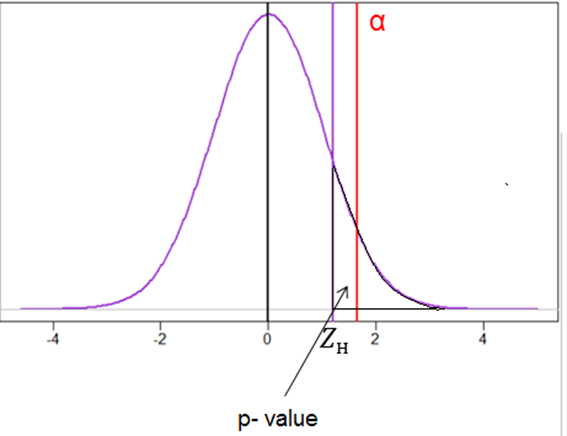

P-value на графике – это вероятность в распределение тест-статистика, которая лежит за пределами наблюдаемого значения.

Р-value > α, мы принимаем $H_0$. \
Р-value < α, отвергаем нулевую гипотезу $H_0$.

***
## Ошибки при тестировании гипотез

**Ошибка I рода**: мы отвергаем $H_0$, когда она верна. \
Уровень значимости $\alpha$ – вероятность ошибки I рода.
 
**Ошибка II рода**: мы принимаем $H_0$,когда она неверна.\
$\beta$ - вероятность ошибки II рода ($\beta<0.2$).

$(1-\beta)$ – **мощность теста** – вероятность отклонить $H_0$, когда верна $H_1$.

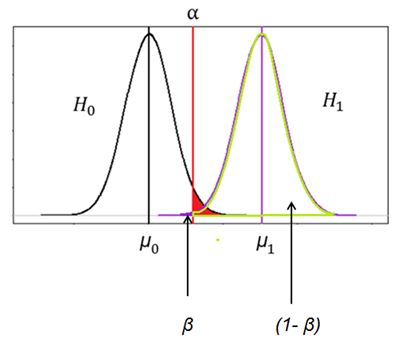

***
## Проверка на нормальность

Мы сказали, что параметрические тесты надо использовать, когда у нас есть уверенность, что выборка взята из нормально распределенной совокупности ну или хотя бы приблизительно соблюдаются условия нормальности.

Мы можем проверить нашу выборку на нормальность с помощью разных тестов на нормальность. Например, тест Шапиро- Уилка. Где нулевая гипотеза о том, что нет отличий от нормального распределения и альтернативная гипотеза, что  распределение отлично от нормального.

In [ ]:
import scipy.stats as stats

stats.shapiro(X)

Но проблема в том, что подобные тесты очень чувствительны к объему выборки. И если вы используете большие объемы выборок, то такой тест может показать вам очень маленькое значение p-value, что будет свидетельствовать об отклонениях от нормальности. Т.е. с увеличением выборок тест будет обнаруживать даже малейшие отклонения от нормальности. Поэтому, если Вы столкнулись с большими объемами выборок, лучше использовать графический метод оценки на нормальность QQ-плот.

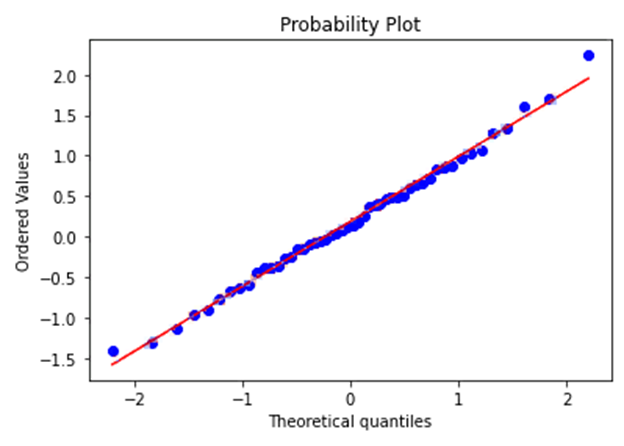

Идея графика заключается в следующем: по оси х теоретические квантили, а по оси y упорядоченные значения. Теоретические квантили – это квантили нормального стандартного распределения (z-значения).

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize = [6, 6])

stats.probplot(X, dist="norm", plot=plt)

plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid();